In [1]:
import warnings

# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

## 실습에 주로 활용할 데이터 셋

[sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

`sklearn.dataset`에서 제공해주는 다양한 샘플 데이터를 활용합니다.

### iris 데이터셋

꽃 종류 분류하기

[iris 데이터셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [3]:
from sklearn.datasets import load_iris

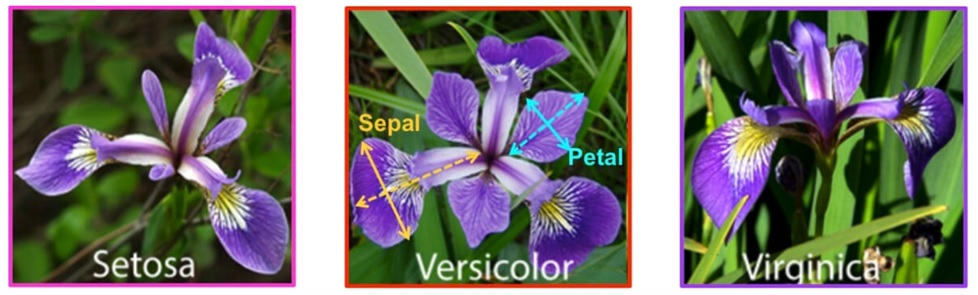

In [4]:
# iris 데이터셋을 로드
iris = load_iris()

* `DESCR`: 데이터셋의 정보를 보여줍니다.
* `data`: feature data.
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
data = iris['data']
# feature data

In [7]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
feature_names = iris['feature_names']
# feature data의 컬럼 이름

In [9]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

In [10]:
target = iris['target']
# label data (수치형)

In [11]:
target[:5]

array([0, 0, 0, 0, 0])

In [12]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [13]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [14]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df_iris['target'] = target

In [16]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 시각화

In [17]:
import matplotlib.pyplot as plt
# matplotlib : 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지

import seaborn as sns
# seaborn : Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

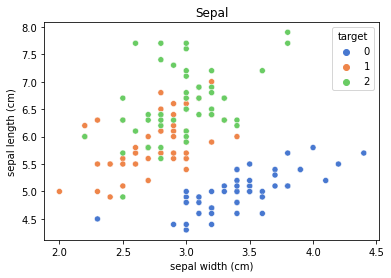

In [18]:
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
# 산점도 그래프
# sns.scatterplot(x축, y축, hue='target', palette='muted', data=df_iris)
# hue : 어떤 변수를 기준으로 다른 색을 칠할 것인지
# data : 어떤 데이터프레임을 이용할지
# palette : 여러 개의 색상을 지정할 때 사용
# alpha로 : 점의 불투명도(0은 완전 투명, 1은 완전 불투명)

plt.title('Sepal')    # 그래프의 제목
plt.show()

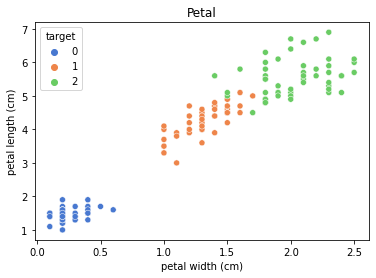

In [19]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

In [20]:
from mpl_toolkits.mplot3d import Axes3D
# mpl_toolkits.mplot3d : 3차원 그래프 그리는 패키지
# Axes3D : 클래스
# Matplotlib 3.1.0 버전부터는 디폴트로 포함

from sklearn.decomposition import PCA
# 주성분 분석(PCA, Principal Component Analysis)은 가장 대표적인 차원 축소 알고리즘

Figure(576x432) <class 'matplotlib.figure.Figure'>
Axes3D(0,0;1x1) <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


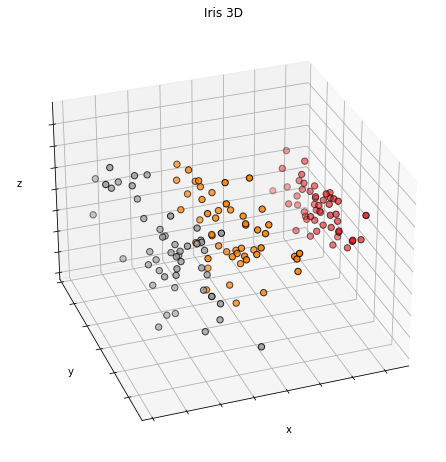

In [21]:
fig = plt.figure(figsize=(8, 6))
# 사이즈가 x축이 8, y축이 6인 figure 생성

print(fig, type(fig))

ax = Axes3D(fig, elev=-150, azim=110)
# Axes3D 객체 생성
# elev : 적절한 높이 조정
# azim : 방위각 조정

print(ax, type(ax))

X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
# n_components : 주성분을 몇개로 할지 결정

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Iris 3D")

ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [22]:
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
# n_components : 주성분을 몇개로 할지 결정

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'])

In [25]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [26]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

<AxesSubplot:xlabel='target', ylabel='count'>

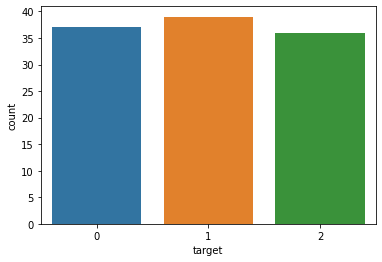

In [27]:
sns.countplot(y_train)
# 막대 그래프 그리기

stratify: label의 클래스의 분포를 균등하게 배분

In [28]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

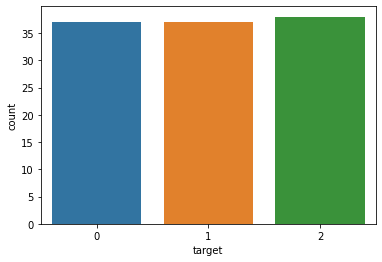

In [29]:
sns.countplot(y_train)

In [30]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [31]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

### Logistic Regression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

* 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법

LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

하지만, 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별하게 됩니다.

**one-vs-rest (OvR)**: K 개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별

**one-vs-one (OvO)**: 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, 0vs1, 0vs2, 0vs3, ... , 2vs3 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

대부분 **OvsR 전략을 선호**합니다.

In [32]:
from sklearn.linear_model import LogisticRegression

**step 1: 모델 선언**

In [33]:
model = LogisticRegression()

**step 2: 모델 학습**

In [34]:
model.fit(x_train, y_train)

LogisticRegression()

In [35]:
model.coef_
# 기울기

array([[-0.43592553,  0.86467352, -2.33600718, -1.00480037],
       [ 0.46335731, -0.21879923, -0.19349782, -0.78387304],
       [-0.02743178, -0.64587429,  2.529505  ,  1.78867341]])

In [36]:
model.intercept_
# 절편

array([  9.47020622,   1.91101611, -11.38122232])

**step 3: 예측**

In [37]:
prediction = model.predict(x_valid)

In [38]:
prediction[:5]

array([1, 2, 0, 0, 2])

**step 4: 평가**

In [39]:
(prediction == y_valid).mean()

0.9736842105263158

### SGDClassifier

**stochastic gradient descent (SGD)**: 확률적 경사 하강법

In [40]:
from IPython.display import Image

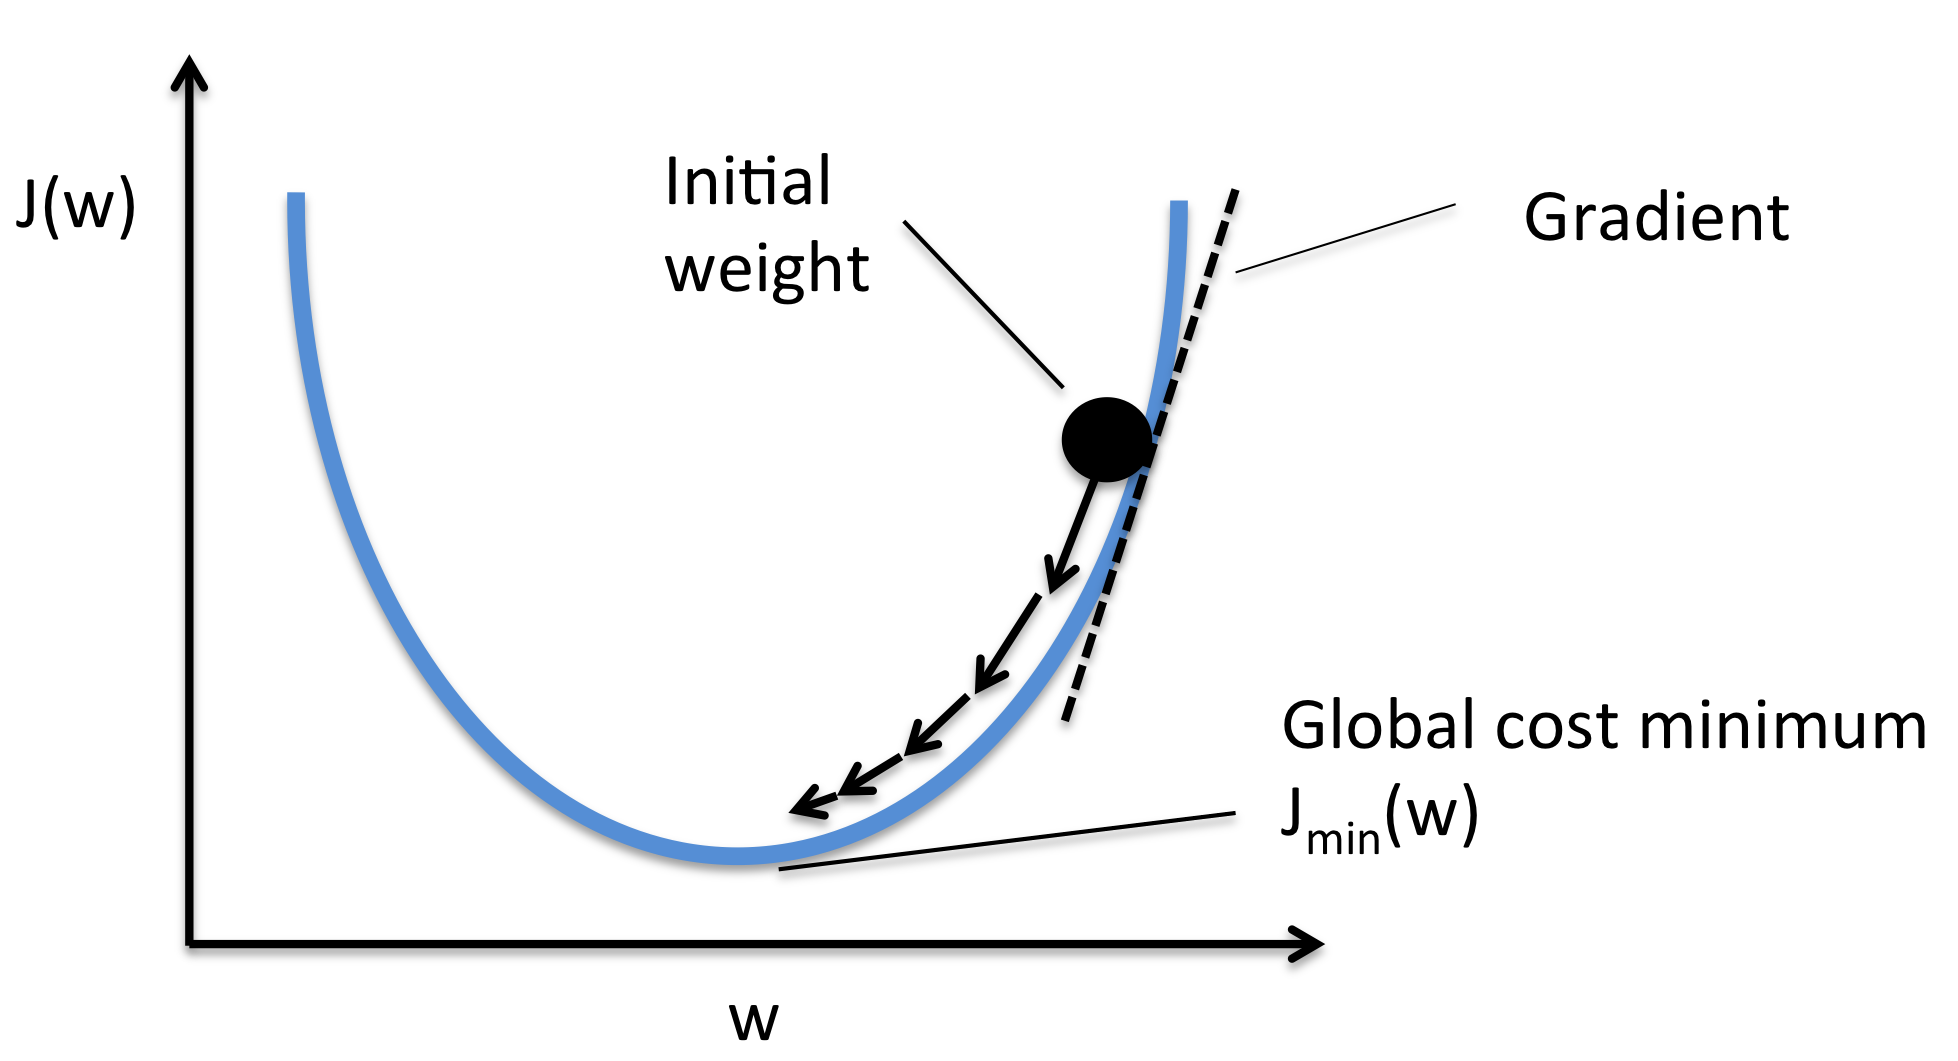

In [41]:
# 출처: https://machinelearningnotepad.wordpress.com/
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

[sklearn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [42]:
from sklearn.linear_model import SGDClassifier

**step 1: 모델 선언**

In [43]:
sgd = SGDClassifier(random_state=0)

**step 2: 모델 학습**

In [44]:
sgd.fit(x_train, y_train)

SGDClassifier(random_state=0)

**step 3: 예측**

In [45]:
prediction = sgd.predict(x_valid)

In [46]:
(prediction == y_valid).mean()

0.631578947368421

### 하이퍼 파라미터 (hyper-parameter) 튜닝

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

각 알고리즘 별, hyper-parameter의 종류가 다양합니다.

모두 다 외워서 할 수는 없습니다! 문서를 보고 적절한 가설을 세운 다음 적용하면서 검증해야합니다.

(나중에는 이 또한 자동으로 할 수 있습니다)

* random_state: 하이퍼 파라미터 튜닝시, 고정할 것
* n_jobs=-1: CPU를 모두 사용 (학습속도가 빠름)

In [47]:
sgd = SGDClassifier(penalty='l1', random_state=0, n_jobs=-1)

In [48]:
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=0)

In [49]:
prediction = sgd.predict(x_valid)

In [50]:
(prediction == y_valid).mean()

0.9736842105263158

### KNeighborsClassifier

최근접 이웃 알고리즘

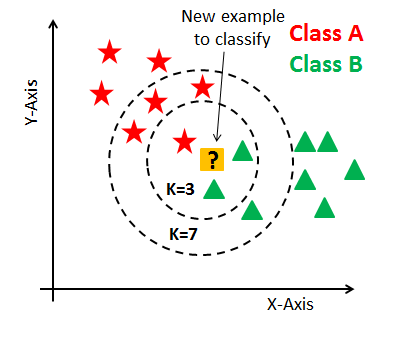

In [51]:
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knc = KNeighborsClassifier()

In [54]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [55]:
knc_pred = knc.predict(x_valid)

In [56]:
(knc_pred == y_valid).mean()

0.9473684210526315

In [57]:
knc = KNeighborsClassifier(n_neighbors=9)
knc.fit(x_train, y_train)
knc_pred = knc.predict(x_valid)

In [58]:
(knc_pred == y_valid).mean()

0.9736842105263158

### 서포트 벡터 머신 (SVC)

* 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.
* 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

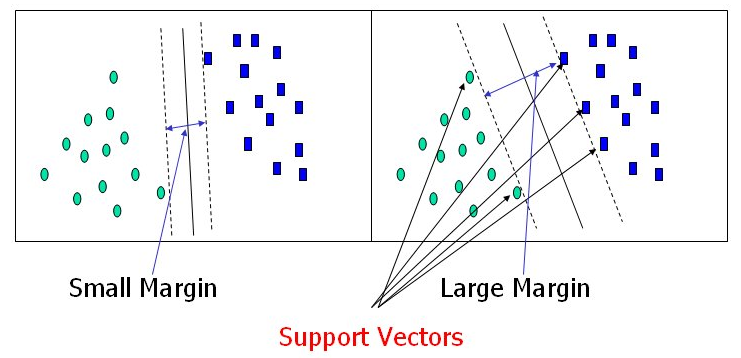

In [59]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

LogisticRegression과 같이 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

- OvsR 전략 사용

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC(random_state=0,)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)

In [62]:
svc

SVC(random_state=0)

In [63]:
(svc_pred == y_valid).mean()

0.9736842105263158

In [64]:
svc_pred[:5]

array([1, 2, 0, 0, 2])

각 클래스 별 확률값을 return 해주는 `decision_function()`

In [65]:
svc.decision_function(x_valid)[:5]

array([[-0.23576052,  2.19878548,  1.16140735],
       [-0.24050413,  1.15509841,  2.21081283],
       [ 2.22276133,  1.18703962, -0.25569023],
       [ 2.23249482,  1.15081723, -0.25266094],
       [-0.23380764,  1.04117519,  2.22943564]])

### 의사 결정 나무 (Decision Tree)

스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것

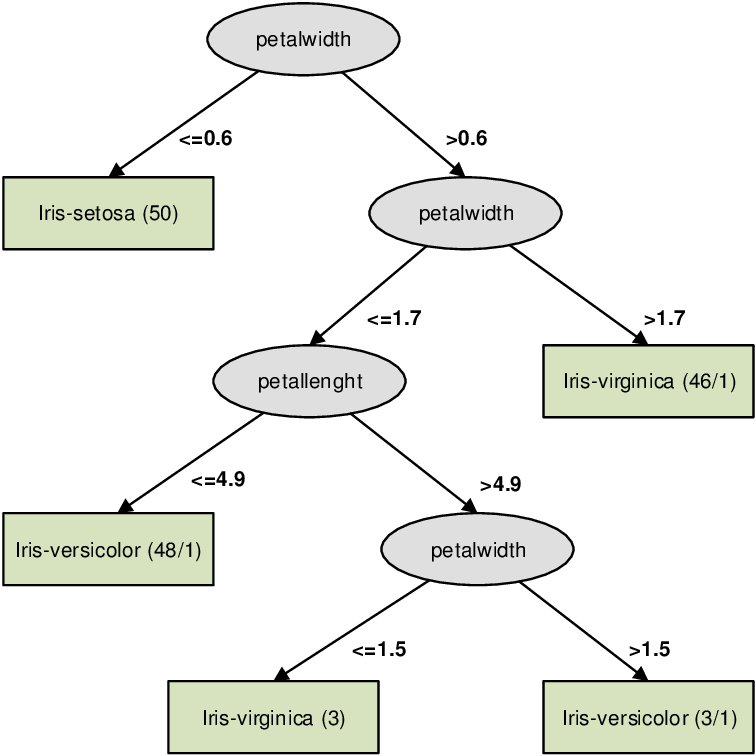

In [66]:
Image('https://www.researchgate.net/profile/Ludmila_Aleksejeva/publication/293194222/figure/fig1/AS:669028842487827@1536520314657/Decision-tree-for-Iris-dataset.png', width=500)

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtc = DecisionTreeClassifier(random_state=0)

In [69]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [70]:
dtc_pred = dtc.predict(x_valid)

In [71]:
(dtc_pred == y_valid).mean()

0.9473684210526315

In [72]:
from sklearn.tree import export_graphviz
from subprocess import call

In [73]:
def graph_tree(model):
    # .dot 파일로 export 해줍니다
    export_graphviz(model, out_file='tree.dot')

    # 생성된 .dot 파일을 .png로 변환
    
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png 출력
    return Image(filename = 'decistion-tree.png', width=500)

In [74]:
graph_tree(dtc)

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

gini계수: 불순도를 의미하며, 계수가 높을 수록 엔트로피가 크다는 의미하며

엔트로피가 크다는 의미는 쉽게 말해서, 클래스가 혼잡하게 섞여 있다는 뜻입니다.

In [ ]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)

In [75]:
graph_tree(dtc)

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

## 오차 (Error)

### 정확도의 함정

In [76]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

유방암 환자 데이터셋을 로드합니다.

**target**: 0: 악성종양, 1:양성종양

In [77]:
cancer = load_breast_cancer()

In [78]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [79]:
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']

데이터 프레임을 생성합니다.

In [80]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [81]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [82]:
pos = df.loc[df['target']==1]
neg = df.loc[df['target']==0]

In [83]:
pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


양성 환자 **357개** + 악성 환자 **5개**

In [84]:
sample = pd.concat([pos, neg[:5]], sort=True)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', 1), sample['target'], random_state=42)

모델을 정의하고, 학습합니다.

In [86]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [87]:
(pred == y_test).mean()

0.978021978021978

In [88]:
my_prediction = np.ones(shape=y_test.shape)

In [89]:
(my_prediction == y_test).mean()

0.989010989010989

정확도만 놓고 본다면, 제가 만든 무조건 음성 환자로 예측하는 분류기가 성능이 좋습니다

하지만, 의사가 과연 **무조건 음성 환자로 예측해서 예측율 98.9% 로 말하는 의사**는 자질이 좋은 의사일까요?

정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 **위와 같은 오류**에 빠질 수 있습니다.

이를 보완하고 생겨난 지표들이 있습니다. 차차 알아보겠습니다.

### 오차 행렬 (confusion maxtix)

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix(y_test, pred)

array([[ 1,  0],
       [ 2, 88]], dtype=int64)

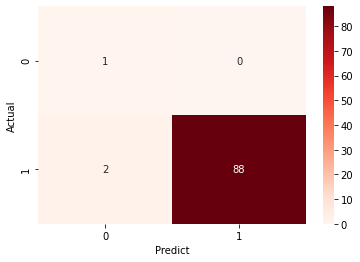

In [92]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds', )
# 히트맵 그리기
# annot : 각 셀의 값을 표시할지 결정하는 것

plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

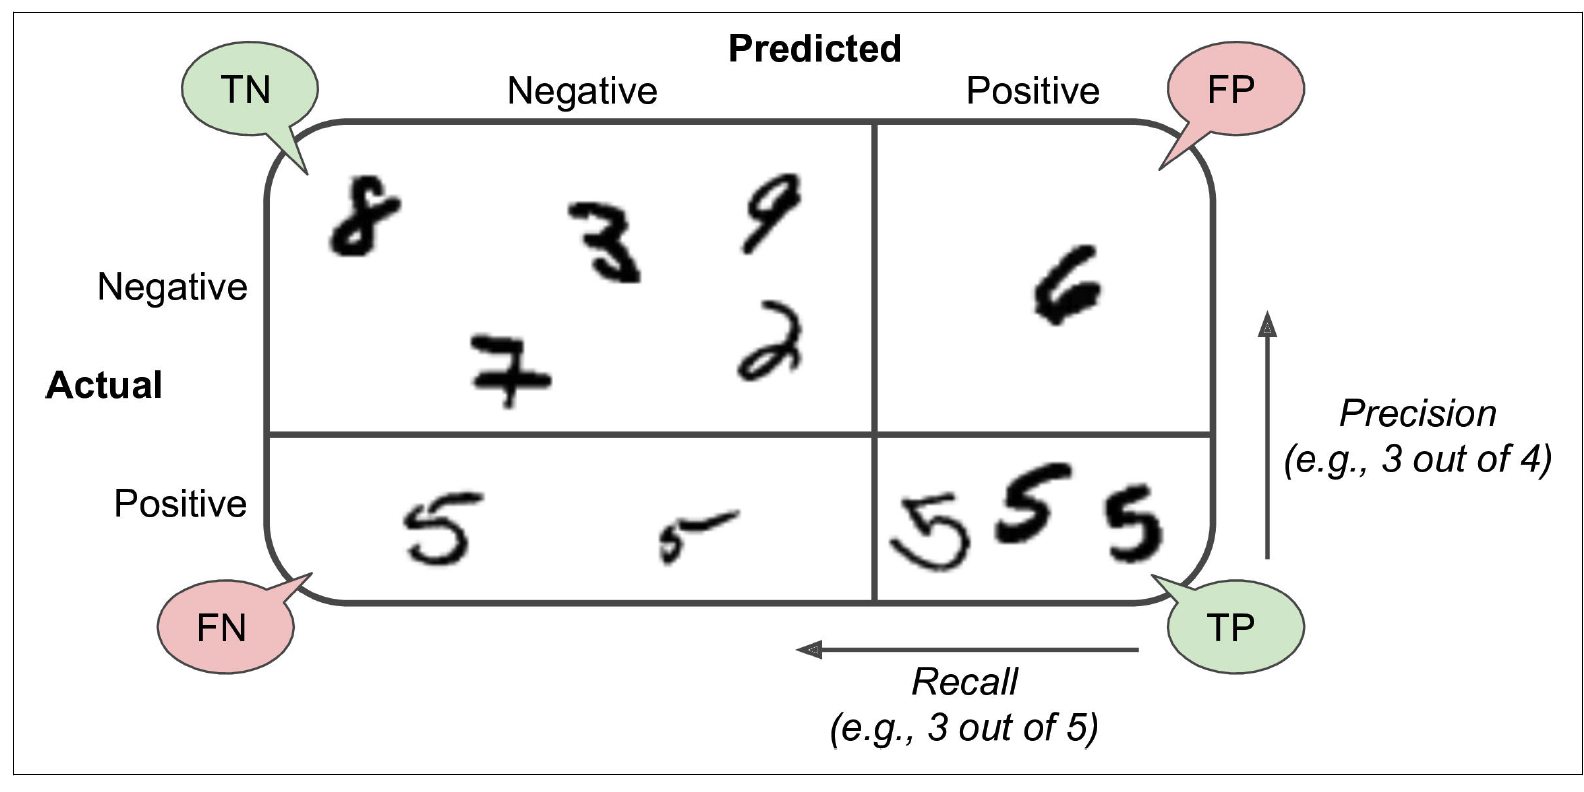

In [93]:
# 출처: https://dojinkimm.github.io
Image('https://dojinkimm.github.io/assets/imgs/ml/handson_3_1.png', width=500)

In [94]:
from sklearn.metrics import precision_score, recall_score

### 정밀도 (precision)

양성 예측 정확도

TP / (TP + FP)

In [95]:
precision_score(y_test, pred)

1.0

무조건 **양성**으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않습니다.

### 재현율 (recall)

TP / (TP + FN)

정확하게 감지한 **양성 샘플의 비율**입니다.

민감도 (sensitivity) 혹은 True Positive Rate (TPR)이라고도 불리웁니다.

In [96]:
recall_score(y_test, pred)

0.9777777777777777

In [97]:
88/90

0.9777777777777777

### f1 score

정밀도와 재현율의 **조화 평균**을 나타내는 지표입니다.

In [98]:
Image('https://miro.medium.com/max/918/1*jCu9fNZS0hSRHVJ2cBTegg.png')

HTTPError: HTTP Error 403: Forbidden

$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$



In [99]:
from sklearn.metrics import f1_score

In [100]:
f1_score(y_test, pred)

0.9887640449438202